<a href="https://colab.research.google.com/github/behrangEhi/AdvancedAlgorithm/blob/main/Quick_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick Sort Algorithm
[Quick Sort | GeeksforGeeks](https://www.youtube.com/watch?v=PgBzjlCcFvc)

[Quicksort Animation](https://www.youtube.com/watch?v=tIYMCYooo3c)

In [ ]:
import random
import numpy as np

## From First

In [ ]:
def partition_F(arr, low, high):
    i = low + 1
    pivot = low

    for j in range(low + 1, high + 1):
        if arr[j] <= arr[pivot]:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1

    arr[pivot], arr[i - 1]  = arr[i - 1], arr[pivot]
    return i - 1

def quicksort_F(arr, low, high):
    if len(arr) == 0 or len(arr) == 1:
        return arr
    if low < high:
        pivot = partition_F(arr, low, high)
        quicksort_F(arr, low, pivot - 1)
        quicksort_F(arr, pivot + 1, high)


In [ ]:
arr = np.random.randint(-100,100,10)
print('random array: ', arr)
quicksort_F(arr, 0, len(arr) - 1)
print('sorted: ', arr)

random array:  [37 -9 98 70 -8 90 91 79 86 42]
sorted:  [-9 -8 37 42 70 79 86 90 91 98]


## From Last

This implementation utilizes pivot as the last element in the nums list It has a pointer to keep track of the elements smaller than the pivot At the very end of partition() function, the pointer is swapped with the pivot to come up with a "sorted" nums relative to the pivot

In [ ]:

# Function to find the partition position
def partition_L(array, low, high):

    # choose the rightmost element as pivot
    pivot = array[high]

    # pointer for greater element
    i = low - 1

    # traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:

            # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1

            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])

    # Swap the pivot element with the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])

    # Return the position from where partition is done
    return i + 1

# function to perform quicksort


def quickSort_L(array, low, high):
    if low < high:

        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition_L(array, low, high)

        # Recursive call on the left of pivot
        quickSort_L(array, low, pi - 1)

        # Recursive call on the right of pivot
        quickSort_L(array, pi + 1, high)

In [ ]:
data = np.random.randint(-100,100,10)
print('random array: ', data)
size = len(data)
quickSort_L(data, 0, size - 1)
print('sorted: ', data)

random array:  [-32  69 -48 -86  -3  17 -82 -20  75 -16]
sorted:  [-86 -82 -48 -32 -20 -16  -3  17  69  75]


## Another implementation

In [ ]:
def sort(array):
    """Sort the array by using quicksort."""

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        # Don't forget to return something!
        return sort(less)+equal+sort(greater)  # Just use the + operator to join lists
    # Note that you want equal ^^^^^ not pivot
    else:  # You need to handle the part at the end of the recursion - when you only have one element in your array, just return the array.
        return array

In [ ]:
arr = np.random.randint(-100,100,10)
print('random array: ', arr)
arrSorted = sort(arr)
print('sorted: ', arrSorted)

random array:  [ 47  93  -9  41  27  48   4 -92 -33  55]
sorted:  [-92, -33, -9, 4, 27, 41, 47, 48, 55, 93]


# Randomized Quick Sort Algorithm


## First Approach: choosing pivot element randomly
[Random Quick Sort Algorithm | Visualization](https://www.youtube.com/watch?v=PSss61qKmEU)


In [ ]:
import random
import numpy as np


In [ ]:
def rand_partition(arr, low, high):
    r_pivot = random.randrange(low, high)
    arr[low], arr[r_pivot] = arr[r_pivot], arr[low]
    return partition_F(arr, low, high)

def rand_quicksort(arr, low, high):
    if len(arr) == 0 or len(arr) == 1:
        return arr
    if low < high:
        pivot = rand_partition(arr, low, high)
        rand_quicksort(arr, low, pivot - 1)
        rand_quicksort(arr, pivot + 1, high)

In [ ]:
arr = np.random.randint(1,100,15)
print('random array: ', arr)
rand_quicksort(arr, 0, len(arr) - 1)
print('sorted: ', arr)

random array:  [79 31 85 57 23 37 24 36 99 70 81 56 81 65  8]
sorted:  [ 8 23 24 31 36 37 56 57 65 70 79 81 81 85 99]


## Second Approach: choosing randomized permutation

In [ ]:
def permutation(arr, low, high):
    if type(arr) == list:
        arr = np.array(arr)
    arr_length = high - low
    new_arr = np.random.choice(arr[low : high],size= arr_length, replace=False)
    for i in range(0 , arr_length):
      arr[low+i] = new_arr[i]
    return arr

def second_rand_quicksort_01(arr, low, high):
    if len(arr) == 0 or len(arr) == 1:
        return arr
    if low < high:
        arr = permutation(arr, low, high)
        pivot = partition_F(arr, low, high)
        second_rand_quicksort_01(arr, low, pivot - 1)
        second_rand_quicksort_01(arr, pivot + 1, high)

def second_rand_quicksort_02(arr, low, high):
  if len(arr) == 0 or len(arr) == 1:
        return arr
  if low < high:
        arr = permutation(arr, low, high)
        rand_quicksort(arr, 0, len(arr) - 1)


In [ ]:
arr = np.random.randint(1,100,8)
arr2 = arr.copy()
print("rand arr : ", arr)
# arr = [98 ,86 ,81, 75, 72, 66, 62, 54, 50, 41, 23, 15, 9, 4, -1, -10, -24, -54]
second_rand_quicksort_01(arr, 0, len(arr) - 1)
print("second_rand_quicksort arr : ", arr)
second_rand_quicksort_02(arr2, 0, len(arr2) - 1)
print("second_rand_quicksort_02 arr : ", arr2)

rand arr :  [89 85 11 55 36 77 20 88]
second_rand_quicksort arr :  [11 20 36 55 77 85 88 89]
second_rand_quicksort_02 arr :  [11 20 36 55 77 85 88 89]


# Evaluation the randomized QS
In this section we will evaluate the runtime of randomized QS and compare it with the classic one.






In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

def arr_gen(n):
    return np.random.randint(0,n,n)

In [ ]:
r_run_times = np.array([])
run_times = np.array([])
r_s01_run_times = np.array([])
r_s02_run_times = np.array([])
sizes = np.array([])

for i in range(10, 300, 20):
    arr = arr_gen(i)
    # Descending sort
    arr = -np.sort(-arr)
    arr2 = arr.copy()
    arr3 = arr.copy()
    arr4 = arr.copy()
    length = len(arr)

    print (len(arr))
    print ("random array: ", arr)

    start = time.time()
    rand_quicksort(arr, 0, length - 1)
    stop = time.time()
    run_time = stop - start
    r_run_times = np.append(r_run_times, run_time)
    print ("rand_quicksort: ", arr)

    start = time.time()
    quicksort_F(arr2, 0, length - 1)
    stop = time.time()
    run_time = stop - start
    run_times = np.append(run_times, run_time)
    print ("quicksort: ", arr2)

    start = time.time()
    second_rand_quicksort_01(arr3, 0, length - 1)
    stop = time.time()
    run_time = stop - start
    r_s01_run_times = np.append(r_s01_run_times, run_time)
    print ("second_rand_quicksort_01: ", arr3)

    start = time.time()
    second_rand_quicksort_02(arr4, 0, length - 1)
    stop = time.time()
    run_time = stop - start
    r_s02_run_times = np.append(r_s02_run_times, run_time)
    print ("second_rand_quicksort_02: ", arr4)

    sizes = np.append(sizes, i)
    print("**************************************************************************")


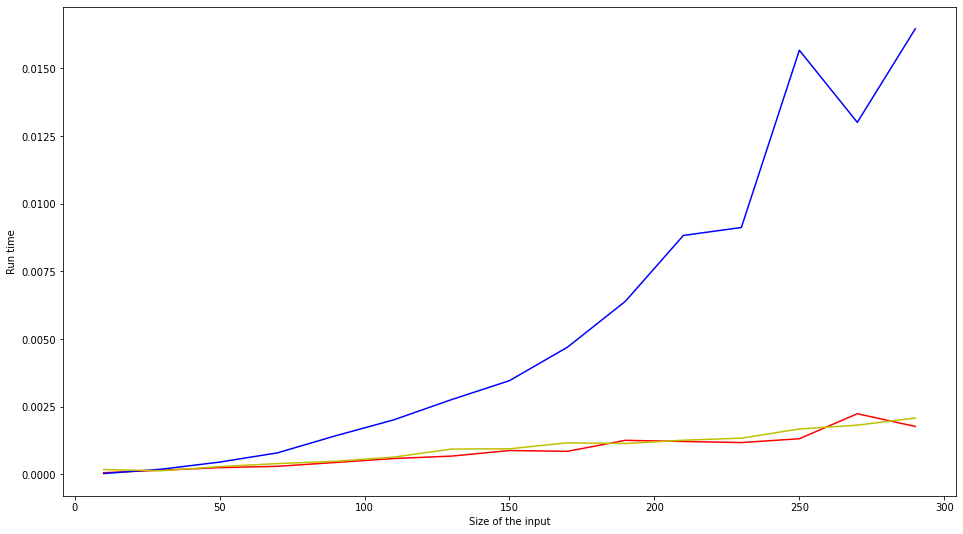

In [ ]:
plt.figure(figsize=(16, 9))
plt.plot(sizes, r_run_times, 'r')
plt.plot(sizes, run_times, 'b')
# plt.plot(sizes, r_s01_run_times, 'g')
plt.plot(sizes, r_s02_run_times, 'y')
plt.ylabel('Run time')
plt.xlabel('Size of the input')
plt.show()